In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
players = pd.read_csv('data/2017.csv')
players.drop(0,inplace=True)

players['Salary'] = players['Salary'].replace('[\$,]','',regex=True).fillna(535000).astype(int)
players['Name'].replace('[*#\\\\].*','',regex=True, inplace=True)
players['PA'].fillna(0)
players['Salary per PA'] = players['Salary'] / players['PA']
players['Is Pitcher'] = players['Pos Summary'].apply(lambda x: str(x).find('1') >= 0)
players.reset_index(drop=True,inplace=True)
# print(players.dtypes)

players.head()

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,...,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Salary per PA,Is Pitcher
0,1.0,Fernando Abad,31.0,BOS,4.0,0.0,0.0,0.0,0.0,0.0,...,0.500,0.500,0.0,0.0,0.0,2000000,Traded,1,inf,True
1,2.0,Jose Abreu,30.0,CHW,156.0,675.0,34.0,1.0,-2.0,0.0,...,0.515,0.514,4.7,-0.9,47.0,10825000,Amateur Free Agent,*3D,1.603704e+04,False
2,3.0,Cristhian Adames,25.0,COL,12.0,14.0,-4.0,0.0,0.0,-1.0,...,0.462,0.497,-0.3,-0.1,-3.0,540000,Amateur Free Agent,/346,3.857143e+04,False
3,4.0,Austin Adams,26.0,WSN,6.0,0.0,0.0,0.0,0.0,0.0,...,0.500,0.500,0.0,0.0,0.0,535000,Traded,/1,inf,True
4,5.0,Lane Adams,27.0,ATL,85.0,122.0,2.0,2.0,0.0,-2.0,...,0.501,0.501,0.7,-0.3,7.0,535000,Free Agency,78/9,4.385246e+03,False


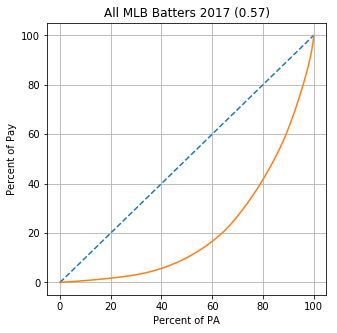

In [19]:
df = players[(players['Is Pitcher']==False)
             & (players['PA'] > 0)].sort_values('Salary per PA').copy()

pa = np.zeros(df.shape[0]+1)
pa[1:] = np.cumsum(df['PA'])/df['PA'].sum()
salary = np.zeros(df.shape[0]+1)
salary[1:] = np.cumsum(df['Salary']) / df['Salary'].sum()
gini = 1 - ((salary[1:]+ salary[:-1])/2 * (pa[1:]-pa[:-1])).sum()/0.5

plt.figure(figsize=(5,5))
plt.plot([0,100],[0,100],ls='--')
plt.plot(pa*100,
         salary*100)
plt.title('All MLB Batters 2017 (%0.2f)' % (gini))
plt.xlabel('Percent of PA')
plt.ylabel('Percent of Pay')
plt.grid()
plt.show()

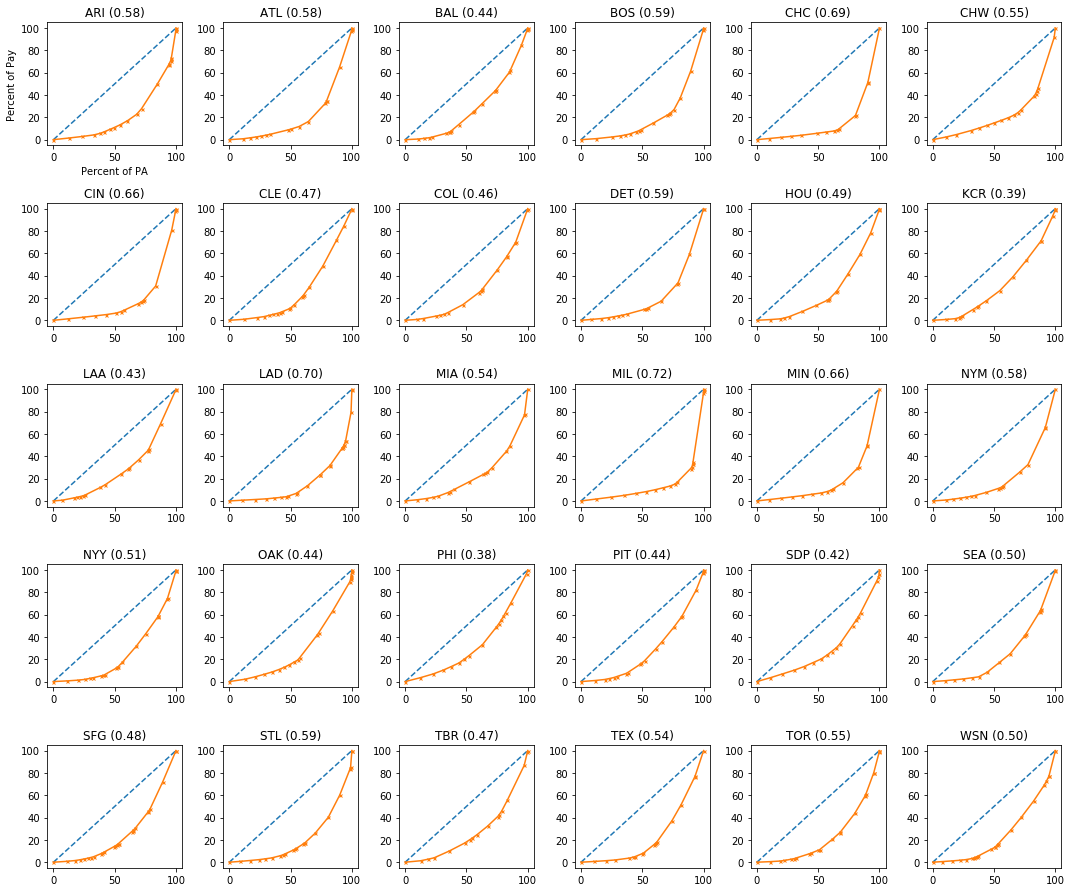

In [54]:
plt.figure(figsize=(15,12.5))

for i,tm in enumerate(players['Tm'].sort_values().unique()[2:]):
    df = players[(players['Tm']==tm) 
                 & (players['Is Pitcher']==False)
                 & (players['PA'] > 0)].sort_values('Salary per PA').copy()
    
    pa = np.zeros(df.shape[0]+1)
    pa[1:] = np.cumsum(df['PA'])/df['PA'].sum()
    salary = np.zeros(df.shape[0]+1)
    salary[1:] = np.cumsum(df['Salary']) / df['Salary'].sum()
    gini = 1 - ((salary[1:]+ salary[:-1])/2 * (pa[1:]-pa[:-1])).sum()/0.5
    
    plt.subplot(5,6,i+1)
    plt.plot([0,100],[0,100],ls='--')
    plt.plot(pa*100,salary*100,
             #where='post',
             marker='x',
             ms=3,
             lw=1.5,
             label=tm)
    if(i==0):
        plt.xlabel('Percent of PA')
        plt.ylabel('Percent of Pay')
    plt.title('%s (%0.2f)' % (tm,gini))

plt.tight_layout()
plt.show()


In [7]:
pitchers = pd.read_csv('data/2017-pitching.csv')
pitchers.drop(0,inplace=True)

pitchers['Salary'] = pitchers['Salary'].replace('[\$,]','',regex=True).fillna(535000).astype(int)
pitchers['Name'].replace('[*#\\\\].*','',regex=True, inplace=True)
pitchers['IP'].fillna(0)
pitchers['Salary per IP'] = pitchers['Salary'] / pitchers['IP']
pitchers.reset_index(drop=True,inplace=True)
# print(pitchers.dtypes)

pitchers.head()

,Rk,Name,Age,Tm,IP,G,GS,R,RA9,RA9opp,...,WAA,gmLI,WAAadj,WAR,RAR,waaWL%,162WL%,Salary,Acquired,Salary per IP
0,2,Austin Adams,26,WSN,5.0,6,0,4,7.20,4.99,...,-0.1,0.06,0.0,0.0,-1.0,0.478,0.499,535000,Traded,107000.000000
1,3,Tim Adleman,29,CIN,122.1,30,20,79,5.81,4.68,...,-1.5,1.04,-0.1,-0.5,-4.0,0.450,0.491,535000,Free Agency,4381.654382
2,4,Andrew Albers,31,SEA,41.0,9,6,22,4.83,4.83,...,-0.1,0.99,-0.1,0.3,4.0,0.491,0.499,535000,Purchased,13048.780488
3,5,Matt Albers,34,WSN,61.0,63,0,12,1.77,4.77,...,2.0,1.10,-0.1,2.5,25.0,0.531,0.512,1150000,Free Agency,18852.459016
4,6,Al Alburquerque,31,2TM,18.0,21,0,5,2.50,4.79,...,0.4,0.63,-0.1,0.5,6.0,0.520,0.501,535000,Free Agency,29722.222222


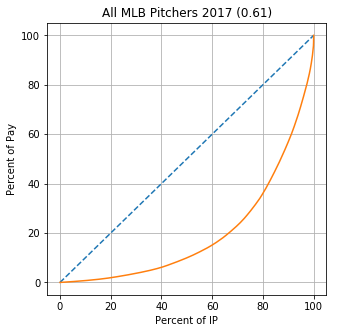

In [31]:
df = pitchers[(pitchers['IP'] > 0)].sort_values('Salary per IP').copy()

pa = np.zeros(df.shape[0]+1)
pa[1:] = np.cumsum(df['IP'])/df['IP'].sum()
salary = np.zeros(df.shape[0]+1)
salary[1:] = np.cumsum(df['Salary']) / df['Salary'].sum()
gini = 1 - ((salary[1:]+ salary[:-1])/2 * (pa[1:]-pa[:-1])).sum()/0.5

plt.figure(figsize=(5,5))
plt.plot([0,100],[0,100],ls='--')
plt.plot(pa*100,
         salary*100)
plt.title('All MLB Pitchers 2017 (%0.2f)' % (gini))
plt.xlabel('Percent of IP')
plt.ylabel('Percent of Pay')
plt.grid()
plt.show()

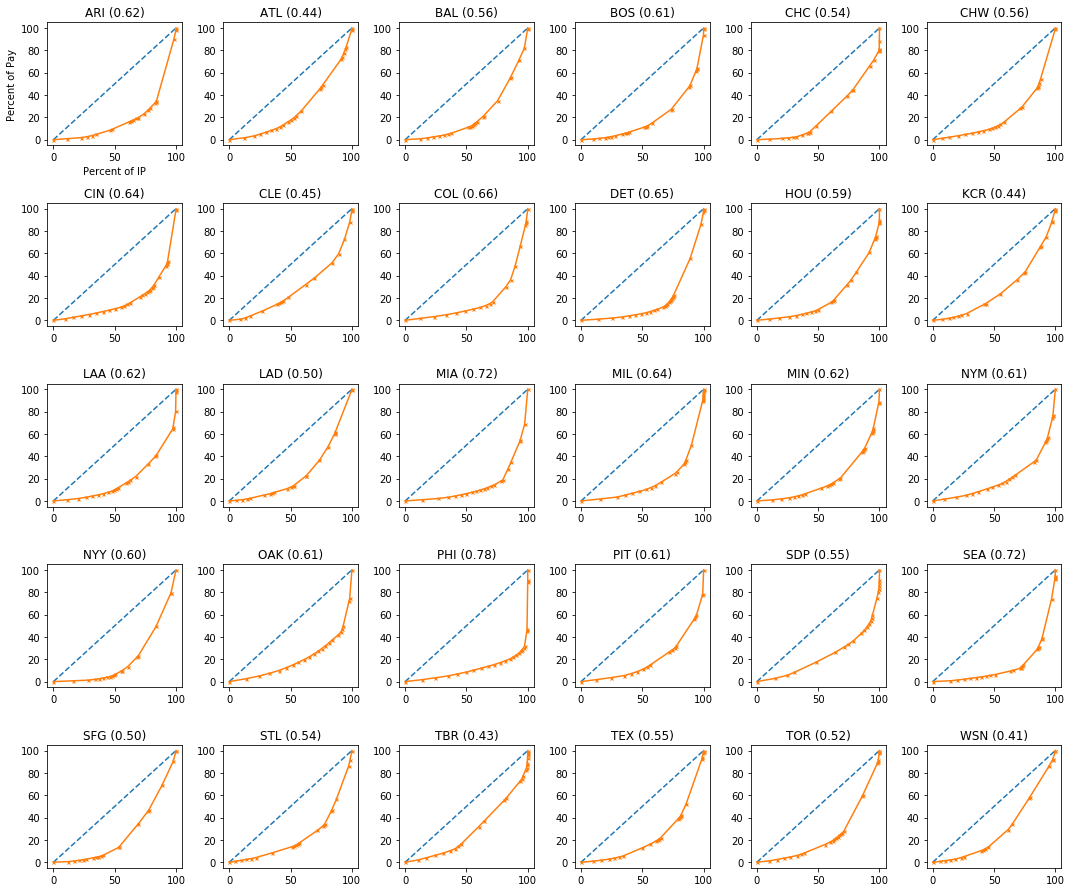

In [56]:
plt.figure(figsize=(15,12.5))

for i,tm in enumerate(pitchers['Tm'].sort_values().unique()[2:]):
    df = pitchers[(pitchers['Tm']==tm) 
                 & (pitchers['IP'] > 0)].sort_values('Salary per IP').copy()
    
    pa = np.zeros(df.shape[0]+1)
    pa[1:] = np.cumsum(df['IP'])/df['IP'].sum()
    salary = np.zeros(df.shape[0]+1)
    salary[1:] = np.cumsum(df['Salary']) / df['Salary'].sum()
    gini = 1 - ((salary[1:]+ salary[:-1])/2 * (pa[1:]-pa[:-1])).sum()/0.5
    
    plt.subplot(5,6,i+1)
    plt.plot([0,100],[0,100],ls='--')
    plt.plot(pa*100,salary*100,
             #where='post',
             marker='x',
             ms=3,
             lw=1.5,
             label=tm)
    if(i==0):
        plt.xlabel('Percent of IP')
        plt.ylabel('Percent of Pay')
    plt.title('%s (%0.2f)' % (tm,gini))

plt.tight_layout()
plt.show()
